In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
import glob
import PIL
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.models import Model
from keras.layers import (BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Input)
from keras import backend as K

In [ ]:
import tensorflow as tf
tf.__version__

!sudo pip3 install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.layers import Layer, InputSpec

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# pixels range from 0 to 255 so dividing by 255 so value lie between 0 and 1 and ML works best with numbers between 0 and 1.
# We split dataset into training and validation category. Model learns from Train data and Model accuracy is checked with Validation data as this is the data model has not train on. (unknown real world image)

normal = glob.glob('../content/drive/MyDrive/cleandata/train/NORMAL/*.*')
pneumonia = glob.glob('../content/drive/MyDrive/cleandata/train/PNEUMONIA/*.*')
tuber = glob.glob('../content/drive/MyDrive/cleandata/train/TURBERCULOSIS/*.*')

normal_test = glob.glob('../content/drive/MyDrive/cleandata/test/NORMAL/*.*')
pneumonia_test = glob.glob('../content/drive/MyDrive/cleandata/test/PNEUMONIA/*.*')
tuber_test = glob.glob('../content/drive/MyDrive/cleandata/test/TURBERCULOSIS/*.*')
 
normal.extend(normal_test)
pneumonia.extend(pneumonia_test)
tuber.extend(tuber_test)


data = []
labels = []


for i in normal:   
    image=tf.keras.preprocessing.image.load_img(i, 
    target_size= (224,224,3))
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in pneumonia[:566]:   
    image=tf.keras.preprocessing.image.load_img(i, 
    target_size= (224,224,3))
    image=np.array(image)
    data.append(image)
    labels.append(1)
for i in tuber[:566]:   
    image=tf.keras.preprocessing.image.load_img(i, 
    target_size= (224,224,3))
    image=np.array(image)
    data.append(image)
    labels.append(2)

data = np.array(data)
labels = np.array(labels)

In [ ]:
len(data)

2707

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2,random_state=42,stratify=labels)


In [ ]:
def VGGupdated(input_tensor=None, classes=3): 
    
    img_rows, img_cols = 224,224
    img_channels = 3 #we are going to work on coloured images
    
    img_dim = (img_rows, img_cols, img_channels) #224,224,3
    
    img_input = Input(shape = img_dim) #input from user we want is tis
    
    
    #block1
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='block1_conv1')(img_input) #64 filters of 3x3,padding same as we want size of output image ame as input image
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='block1_conv2')(x)#relu will replace all the negative values with 0
    x = MaxPooling2D((2,2), strides=(2,2), name='block1_pool')(x) #pooling to reduce the image size, strides the window size for scanning
    
    #block2
    x = Conv2D(128, (3,3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3,3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2,2), strides=(2,2), name='block2_pool')(x) 
    
    #block3
    x = Conv2D(256, (3,3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3,3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3,3), activation='relu', padding='same', name='block3_conv3')(x)
    #x = Conv2D(256, (3,3), activation='relu', padding='same', name='block3_conv3')(x)

    x = MaxPooling2D((2,2), strides=(2,2), name='block3_pool')(x)
    
    #block4
    x = Conv2D(512, (3,3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3,3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3,3), activation='relu', padding='same', name='block4_conv3')(x)
    #x = Conv2D(512, (3,3), activation='relu', padding='same', name='block4_conv4')(x)
    x = MaxPooling2D((2,2), strides=(2,2), name='block4_pool')(x)
    
    #block5
    x = Conv2D(512, (3,3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3,3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3,3), activation='relu', padding='same', name='block5_conv3')(x)
    #x = Conv2D(512, (3,3), activation='relu', padding='same', name='block5_conv4')(x)
    x = MaxPooling2D((2,2), strides=(2,2), name='block5_pool')(x)
    
    #classification block
    x = Flatten(name='flatten')(x) #when we need to classify image we ned to flaten it
    x = Dense(4096, activation='relu', name='fc1')(x) #4096 nurons
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(1000, activation='relu', name='fc3')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)
    
    
    #create model
    model = Model(inputs = img_input, outputs = x, name='vggtuber')
    
    return model

In [ ]:
model = VGGupdated(classes = 3) 

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "vggtuber"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [ ]:
y_train_vgg16 = tf.keras.utils.to_categorical(y_train,3)
y_test_vgg16 = tf.keras.utils.to_categorical(y_test,3)

In [ ]:
y_train_vgg16

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
X_train = tf.expand_dims(X_train,axis=-1)

In [ ]:
y_train_vgg16.shape

(2165, 3)

In [ ]:
X_test = tf.expand_dims(X_test,axis=-1)

In [ ]:
y_test_vgg16.shape

(542, 3)

In [ ]:
X_test.shape

TensorShape([542, 224, 224, 3, 1])

In [ ]:
checkpointer = EarlyStopping(monitor = 'val_accuracy', verbose = 1, restore_best_weights=True,mode="max",patience = 8)
# checkpointer to monitor accuracy and preventing overfit
# if validation accuracy do not imporve for 15 turns the training will stop.

In [ ]:
history = model.fit(
            X_train,
            y_train_vgg16,
            epochs=20,
            verbose=1,
            validation_split= 0.2,
            callbacks = [checkpointer])

Epoch 1/20
55/55 [==============================] - 405s 7s/step - loss: 415.8477 - accuracy: 0.5479 - val_loss: 0.9751 - val_accuracy: 0.5727
Epoch 2/20
55/55 [==============================] - 353s 6s/step - loss: 1.1205 - accuracy: 0.5739 - val_loss: 0.9890 - val_accuracy: 0.5727
Epoch 3/20
55/55 [==============================] - 351s 6s/step - loss: 0.9780 - accuracy: 0.5837 - val_loss: 0.9841 - val_accuracy: 0.5727
Epoch 4/20
55/55 [==============================] - 352s 6s/step - loss: 0.9702 - accuracy: 0.5837 - val_loss: 0.9788 - val_accuracy: 0.5727
Epoch 5/20
55/55 [==============================] - 367s 7s/step - loss: 0.9693 - accuracy: 0.5837 - val_loss: 0.9110 - val_accuracy: 0.5727
Epoch 6/20
55/55 [==============================] - 364s 7s/step - loss: 1.0712 - accuracy: 0.5589 - val_loss: 1.0425 - val_accuracy: 0.6051
Epoch 7/20
55/55 [==============================] - 363s 7s/step - loss: 1.0217 - accuracy: 0.5595 - val_loss: 0.9434 - val_accuracy: 0.5727
Epoch 8/20


In [ ]:
print(f"Final Train accuracy = {model.evaluate(X_train,y_train_vgg16)[1]*100}%")
print(f"Validation accuracy = {model.evaluate(X_test,y_test_vgg16)[1]*100}%")

68/68 [==============================] - 68s 1s/step - loss: 0.2778 - accuracy: 0.9196
Final Train accuracy = 91.96304678916931%
17/17 [==============================] - 17s 1s/step - loss: 0.3078 - accuracy: 0.9096
Validation accuracy = 90.95941185951233%


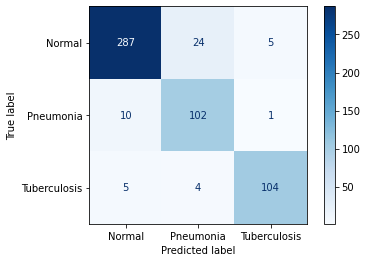

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
prediction = model.predict(X_test)
cm = confusion_matrix(y_test_vgg16.argmax(axis=1), prediction.argmax(axis=1))
labels = ["Normal","Pneumonia","Tuberculosis"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
import tensorflow as tf
from keras.models import load_model
model.save('vgg16isbest1997.h5')

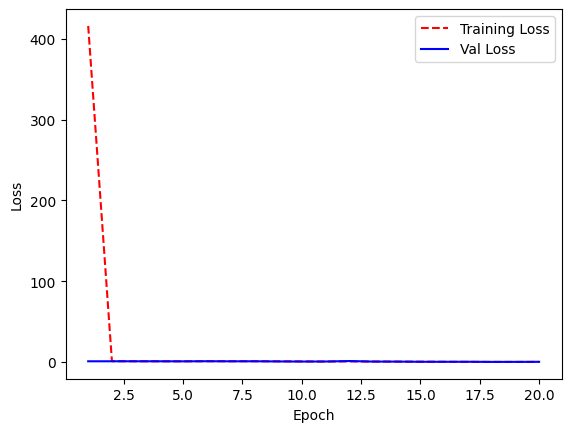

In [ ]:
training_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.rcParams['figure.figsize'] = [10, 5]
plt.style.use(['default'])
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

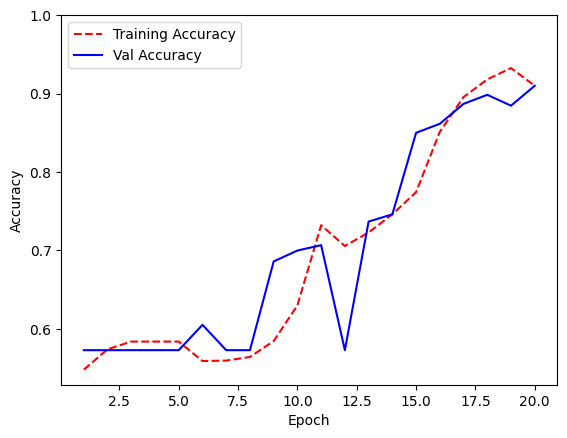

In [ ]:
training_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize loss history

plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, val_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(top = 1)
plt.show()

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.models import load_model
import cv2

In [ ]:
model=load_model('/content/vgg16isbest1997.h5')

In [ ]:
img_path=image.load_img('/content/drive/MyDrive/cleandata/val/TURBERCULOSIS/Tuberculosis-651.png',target_size=(224,224))






In [ ]:
#from matplotlib import imread
img_path='/content/drive/MyDrive/cleandata/val/NORMAL/NORMAL2-IM-1438-0001.jpeg'
img = image.load_img(img_path, target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
x=preprocess_input(x)
print('input image shape: ', x.shape)
print(model.predict(x))


input image shape:  (1, 224, 224, 3)
[[5.0770800e-16 2.0241153e-09 1.0000000e+00]]


In [ ]:
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)


In [ ]:
result=int(classes[0][1])

In [ ]:
if result==0:
  print("Healthy")
elif result==1:
  print("Pneumonia")
else:
  print("Tuberculosis")

Healthy
